In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import random
import scipy
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots
from scipy.spatial.distance import pdist, squareform

In [2]:
format_plots()
#format_pizza_plots()

In [3]:
from matplotlib.colors import LinearSegmentedColormap
# Define the color map
colors = ['#dadaeb','#6a51a3']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

In [4]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_relabeled_usage_matrix_v00.parquet')
#path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_relabeled_counts_matrix_v00.parquet')
df = pd.read_parquet(path)

In [5]:
## update data
def filter_df(df):
    max=39
    #df.drop('9c060c9b-9eee-4788-90be-803700bbacd8',level=3, axis=0, inplace=True)
    syll=df.columns.values[df.columns.values>max]
    df.drop(syll,axis=1, inplace=True)
    return df[~df.index.get_level_values('session_name').str.contains('CRL')]

In [6]:
# arrange data
data = df.astype(float, errors='ignore')
#data= filter_df(data).groupby(['age','uuid']).mean()
data= filter_df(data).groupby(['age']).mean()
ages = data.index.get_level_values('age')
#mice = data.index.get_level_values('uuid')
data = data.to_numpy()

In [7]:
# get JSD
kld = squareform(pdist(data, metric='jensenshannon'))
#dm[np.diag_indices_from(dm)] = np.nan
data_labels=ages

In [8]:
#colors for plotting
cmap2 = cmm
ages = np.unique(data_labels)
colors = np.int_(np.arange(0, 256, 256/len(ages)))
seqmatcolor='cubehelix'

# create age labels colors
lines=[]
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        color_mat.append(cmap2(c))

<Figure size 1200x1200 with 0 Axes>

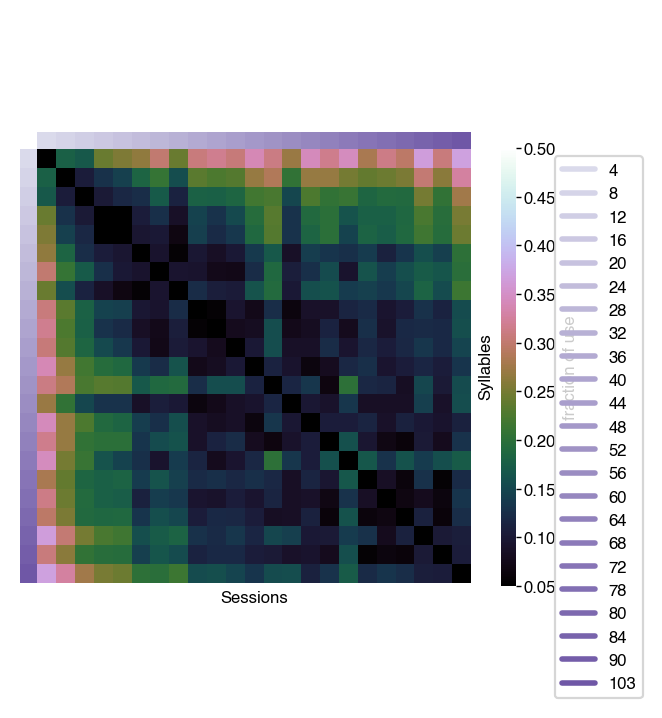

In [9]:
# plot syllable usage acoss time points
figure(4,4)
cg=sns.clustermap(
    data=kld,
    cmap=seqmatcolor, 
    figsize=(3, 3),
    col_colors=color_mat,
    row_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    yticklabels=False,
    xticklabels=False,
    method='average',
    #method = 'single',
    metric='sqeuclidean',
    #metric='cosine',
    rasterized=True,
    #metric='jensenshannon',
    cbar_kws={'label': 'fraction of use'}, 
    vmin=0.05,
    vmax=0.5)
cg.ax_row_dendrogram.set_visible(False)
ax = cg.ax_heatmap
ax.tick_params(left=False, bottom=False, right=False)
ax.set_xlabel('Sessions')
ax.set_ylabel('Syllables')

# legend
for i,c in enumerate(colors):
        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))
plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(10, 1),loc='upper right',fontsize=6)
plt.show()

In [10]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig2"/ 'C_age_dist_jsd.pdf', bbox_inches='tight', dpi=600)

In [11]:
from sklearn.metrics import pairwise_distances
utemp = pairwise_distances(data)
ctemp = pairwise_distances(data, metric = 'cosine')

<Figure size 900x900 with 0 Axes>

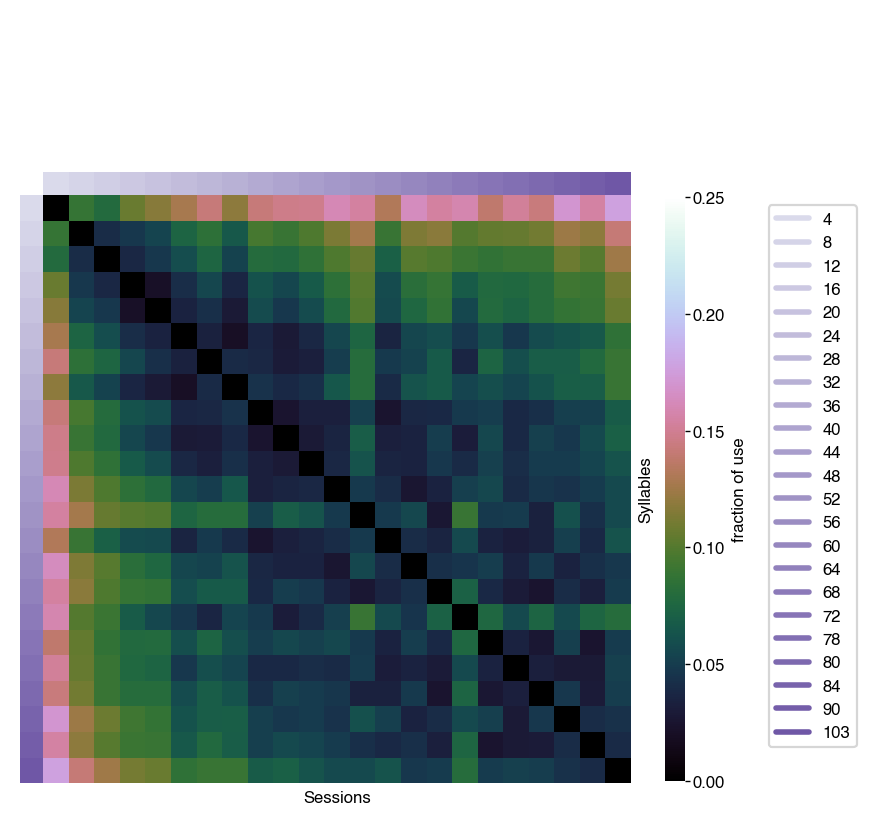

In [12]:
# plot syllable usage acoss time points
figure(3,3)
cg=sns.clustermap(
    data=utemp,
    cmap=seqmatcolor, 
    figsize=(4, 4),
    col_colors=color_mat,
    row_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    yticklabels=False,
    xticklabels=False,
    method='average',
    #method = 'single',
    metric='sqeuclidean',
    #metric='cosine',
    rasterized=True,
    #metric='jensenshannon',
    cbar_kws={'label': 'fraction of use'}, 
    vmin=0,
    vmax=0.25)
cg.ax_row_dendrogram.set_visible(False)
ax = cg.ax_heatmap
ax.tick_params(left=False, bottom=False, right=False)
ax.set_xlabel('Sessions')
ax.set_ylabel('Syllables')

# legend
for i,c in enumerate(colors):
        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))
plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(10, 1),loc='upper right',fontsize=6)
plt.show()

In [13]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig2"/ 'C_age_dist_pre_euc.pdf', bbox_inches='tight')

<Figure size 900x900 with 0 Axes>

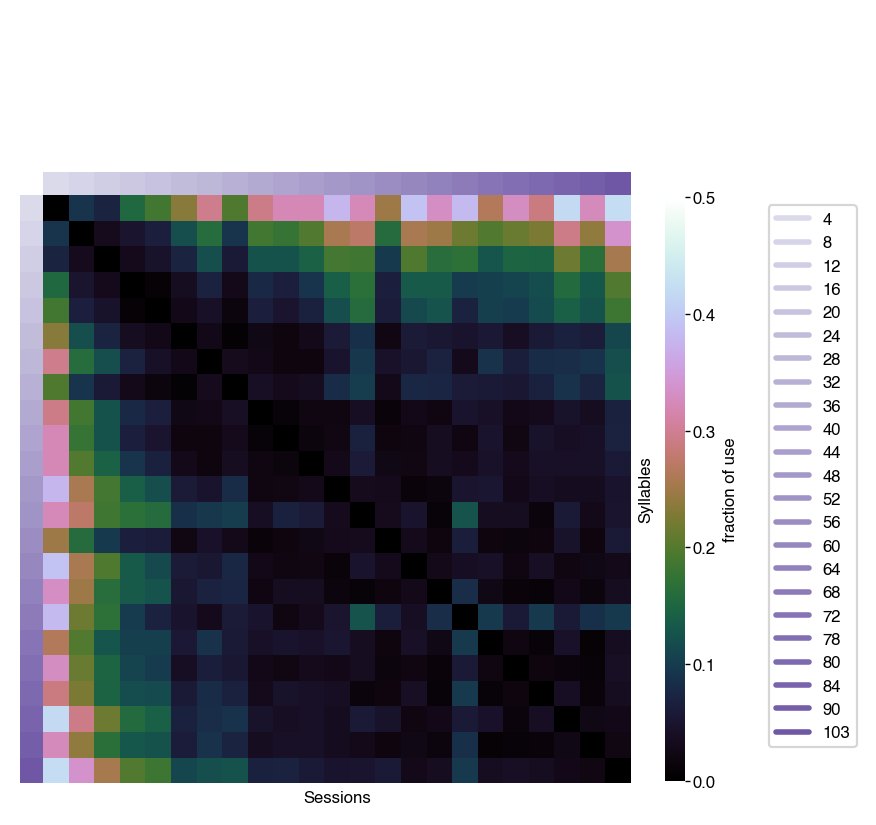

In [14]:
# plot syllable usage acoss time points
figure(3,3)
cg=sns.clustermap(
    data=ctemp,
    cmap=seqmatcolor, 
    figsize=(4, 4),
    col_colors=color_mat,
    row_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    yticklabels=False,
    xticklabels=False,
    method='average',
    #method = 'single',
    #metric='sqeuclidean',
    metric='cosine',
    #metric='jensenshannon',
    rasterized=True,
    cbar_kws={'label': 'fraction of use'}, 
    vmin=0,
    vmax=0.5)
cg.ax_row_dendrogram.set_visible(False)
ax = cg.ax_heatmap
ax.tick_params(left=False, bottom=False, right=False)
ax.set_xlabel('Sessions')
ax.set_ylabel('Syllables')

# legend
for i,c in enumerate(colors):
        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))
plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(10, 1),loc='upper right',fontsize=6)
plt.show()

In [15]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig2"/ 'C_age_dist_pre_cos.pdf', bbox_inches='tight')